ML - Instacart F1 0.38-Part One; Features

https://www.kaggle.com/code/kokovidis/ml-instacart-f1-0-38-part-one-features

위 노트북 분석

In [6]:
import pandas as pd               # for data manipulation
import numpy as np                # for aggregation functions
import gc                         # for clean-up memory

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
orders = pd.read_csv('data/orders.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')

# Get the product tables also --> To create metrics for aisles / departments 
products = pd.read_csv('data/products.csv')
products.product_name = products.product_name.str.replace(' ', '_').str.lower()
products.product_name = products.product_name.str.replace(',', '-').str.lower()

In [8]:
products

,product_id,product_name,aisle_id,department_id
0,1,chocolate_sandwich_cookies,61,19
1,2,all-seasons_salt,104,13
2,3,robust_golden_unsweetened_oolong_tea,94,7
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1
4,5,green_chile_anytime_sauce,5,13
...,...,...,...,...
49683,49684,vodka-_triple_distilled-_twist_of_vanilla,124,5
49684,49685,en_croute_roast_hazelnut_cranberry,42,1
49685,49686,artisan_baguette,112,3
49686,49687,smartblend_healthy_metabolism_dry_cat_food,41,8


In [9]:
prd = orders.merge(order_products_prior, on='order_id', how='left')
prd.head()

# Optionally we can get the name of the products
#prd['product_name'] = products.product_name.str.replace(' ', '_').str.lower()
#prd['product_name'] = products.product_name.str.replace(',', '-').str.lower()
#TRIM DATASETS
#prd = prd.iloc[0:100000]
#prd = prd.iloc[0:15434766]
gc.collect()

1925

In [10]:
prd

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32640693,2977660,206209,prior,13,1,12,7.0,38730.0,6.0,0.0
32640694,2977660,206209,prior,13,1,12,7.0,31477.0,7.0,0.0
32640695,2977660,206209,prior,13,1,12,7.0,6567.0,8.0,0.0
32640696,2977660,206209,prior,13,1,12,7.0,22920.0,9.0,0.0


In [11]:
# 사용자-제품 조합의 총 구입 횟수
uxp = prd.groupby(['user_id', 'product_id'])[['order_id']].count()
uxp.columns = ['uxp_total_bought']
uxp = uxp.reset_index()
uxp

,user_id,product_id,uxp_total_bought
0,1,196.0,10
1,1,10258.0,9
2,1,10326.0,1
3,1,12427.0,10
4,1,13032.0,3
...,...,...,...
13307948,206209,43961.0,3
13307949,206209,44325.0,1
13307950,206209,48370.0,1
13307951,206209,48697.0,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# # scatter plot 생성
# plt.figure(figsize=(12, 8))
# scatter_plot = sns.scatterplot(data=uxp, x='product_id', y='uxp_total_bought', hue='user_id', palette='viridis')

# # plot 제목과 축 라벨 설정
# plt.title('Scatter Plot of Product Purchases')
# plt.xlabel('Product ID')
# plt.ylabel('Total Bought by User')

# # 범례 위치 설정
# plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# # plot 출력
# plt.show()

In [13]:
#Does users frequently reorder a product? (one-shot ratio)

In [14]:
# 사용자들이 해당 제품을 한번만 구입한 횟수
item_one = uxp[uxp.uxp_total_bought==1].groupby('product_id')[['uxp_total_bought']].count()
item_one.columns = ['uxp_customers_one_shot']
item_one

,uxp_customers_one_shot
product_id,
1.0,440
2.0,70
3.0,38
4.0,118
5.0,2
...,...
49684.0,7
49685.0,37
49686.0,20


In [15]:
item_one.index

Index([    1.0,     2.0,     3.0,     4.0,     5.0,     6.0,     7.0,     8.0,
           9.0,    10.0,
       ...
       49679.0, 49680.0, 49681.0, 49682.0, 49683.0, 49684.0, 49685.0, 49686.0,
       49687.0, 49688.0],
      dtype='float64', name='product_id', length=49587)

In [16]:
# 해당 제품을 한번 이상 구입한 사용자 수
item_size = uxp.groupby('product_id')[['user_id']].count()
item_size.columns = ['uxp_unique_customers']
item_size

,uxp_unique_customers
product_id,
1.0,716
2.0,78
3.0,74
4.0,182
5.0,6
...,...
49684.0,8
49685.0,43
49686.0,36


In [17]:
# (Chat-GPT) 이 코드는 두 개의 DataFrame인 item_one과 item_size를 병합(merge)하는 작업을 수행합니다. 
# 병합 방식은 'left'로 지정되어 있으며, 병합 기준은 item_one의 인덱스와 item_size의 'product_id' 열입니다.
userxproduct_var = item_one.merge(item_size, how='left', left_index=True, right_on='product_id')
userxproduct_var

,uxp_customers_one_shot,uxp_unique_customers
product_id,,
1.0,440,716
2.0,70,78
3.0,38,74
4.0,118,182
5.0,2,6
...,...,...
49684.0,7,8
49685.0,37,43
49686.0,20,36


In [18]:
# 해당 제품을 구입한 사용자들 중에서 한번만 구입한 사용자의 비율
userxproduct_var['one_shot_ratio_product'] = userxproduct_var.uxp_customers_one_shot / userxproduct_var.uxp_unique_customers
userxproduct_var = userxproduct_var.reset_index()
userxproduct_var

,product_id,uxp_customers_one_shot,uxp_unique_customers,one_shot_ratio_product
0,1.0,440,716,0.614525
1,2.0,70,78,0.897436
2,3.0,38,74,0.513514
3,4.0,118,182,0.648352
4,5.0,2,6,0.333333
...,...,...,...,...
49582,49684.0,7,8,0.875000
49583,49685.0,37,43,0.860465
49584,49686.0,20,36,0.555556
49585,49687.0,3,7,0.428571


C:\Users\jjam\AppData\Local\Temp\ipykernel_11024\3128639665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=userxproduct_var[userxproduct_var['one_shot_ratio_product'] >= 0.8], x='product_id', y='one_shot_ratio_product', palette='viridis')


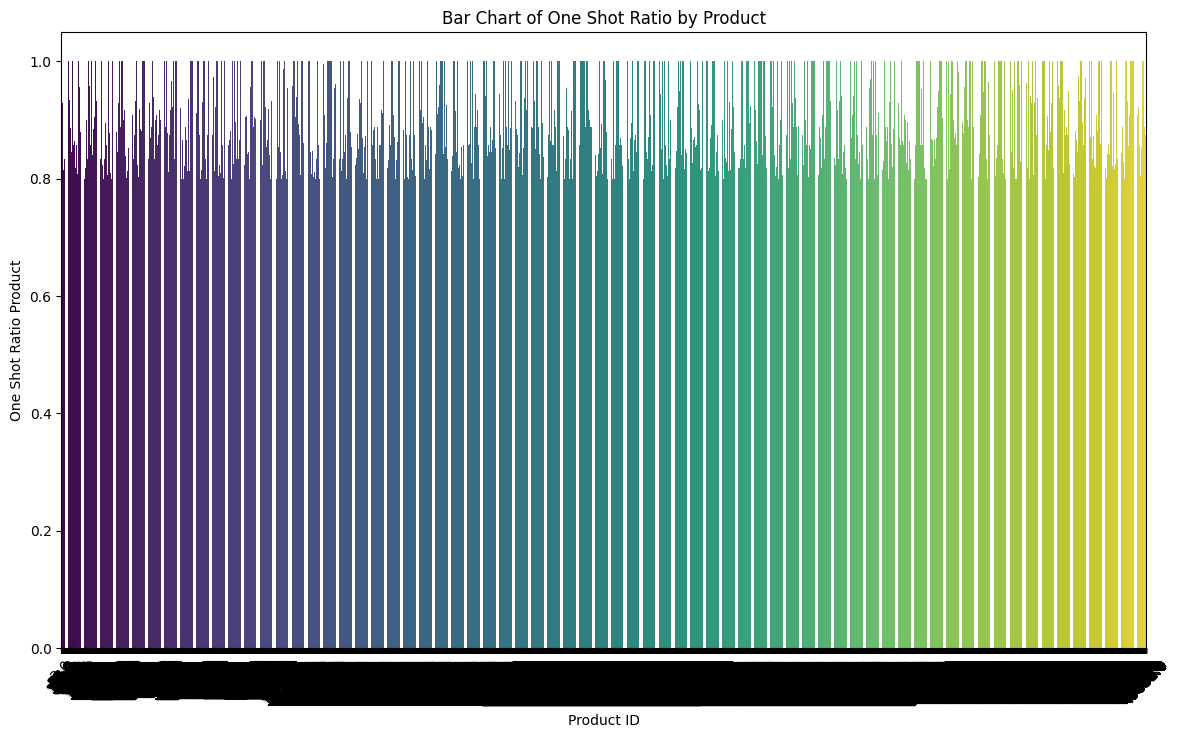

In [20]:
# 그래프가 너무 복잡해서 0.8 이상만 대상으로 그리기.

# bar 차트 생성
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=userxproduct_var[userxproduct_var['one_shot_ratio_product'] >= 0.8], x='product_id', y='one_shot_ratio_product', palette='viridis')

# plot 제목과 축 라벨 설정
plt.title('Bar Chart of One Shot Ratio by Product')
plt.xlabel('Product ID')
plt.ylabel('One Shot Ratio Product')

# x축 값 회전 (필요 시)
plt.xticks(rotation=45)

# plot 출력
plt.show()

In [21]:
userxproduct_var[['product_id', 'one_shot_ratio_product']]

,product_id,one_shot_ratio_product
0,1.0,0.614525
1,2.0,0.897436
2,3.0,0.513514
3,4.0,0.648352
4,5.0,0.333333
...,...,...
49582,49684.0,0.875000
49583,49685.0,0.860465
49584,49686.0,0.555556
49585,49687.0,0.428571


In [22]:
# (Chat-GPT) 병합 기준은 명시적으로 지정되지 않았기 때문에, 두 DataFrame에서 공통된 열 이름을 기준으로 자동으로 병합됩니다. 
# 이 경우, 두 DataFrame에 공통된 열 이름인 'product_id'를 기준으로 병합될 것입니다.
uxp = uxp.merge(userxproduct_var[['product_id', 'one_shot_ratio_product']],how='left')
gc.collect()

0

In [23]:
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product
0,1,196.0,10,0.417500
1,1,10258.0,9,0.447038
2,1,10326.0,1,0.478419
3,1,12427.0,10,0.470518
4,1,13032.0,3,0.520218
...,...,...,...,...
13307948,206209,43961.0,3,0.485358
13307949,206209,44325.0,1,0.710110
13307950,206209,48370.0,1,0.407439
13307951,206209,48697.0,1,0.739338


In [18]:
#last 5 orders

In [24]:
prd.groupby('user_id')['order_number'].transform(max)

C:\Users\jjam\AppData\Local\Temp\ipykernel_11024\4288723308.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  prd.groupby('user_id')['order_number'].transform(max)


0           11
1           11
2           11
3           11
4           11
            ..
32640693    14
32640694    14
32640695    14
32640696    14
32640697    14
Name: order_number, Length: 32640698, dtype: int64

In [25]:
# (Chat-GPT) 각 사용자의 마지막 주문을 기준으로 현재 주문이 얼마나 이전에 이루어졌는지
prd['order_number_back'] = prd.groupby('user_id')['order_number'].transform(max) - prd.order_number +1 
prd

C:\Users\jjam\AppData\Local\Temp\ipykernel_11024\1777545647.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  prd['order_number_back'] = prd.groupby('user_id')['order_number'].transform(max) - prd.order_number +1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,11
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,11
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,11
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,11
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...
32640693,2977660,206209,prior,13,1,12,7.0,38730.0,6.0,0.0,2
32640694,2977660,206209,prior,13,1,12,7.0,31477.0,7.0,0.0,2
32640695,2977660,206209,prior,13,1,12,7.0,6567.0,8.0,0.0,2
32640696,2977660,206209,prior,13,1,12,7.0,22920.0,9.0,0.0,2


In [26]:
# 가장 최근 주문한 최대 5개 주문 정보
prd5 = prd[prd.order_number_back <= 5]
prd5

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
33,550135,1,prior,7,1,9,20.0,196.0,1.0,1.0,5
34,550135,1,prior,7,1,9,20.0,10258.0,2.0,1.0,5
35,550135,1,prior,7,1,9,20.0,12427.0,3.0,1.0,5
36,550135,1,prior,7,1,9,20.0,25133.0,4.0,1.0,5
37,550135,1,prior,7,1,9,20.0,13032.0,5.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...
32640693,2977660,206209,prior,13,1,12,7.0,38730.0,6.0,0.0,2
32640694,2977660,206209,prior,13,1,12,7.0,31477.0,7.0,0.0,2
32640695,2977660,206209,prior,13,1,12,7.0,6567.0,8.0,0.0,2
32640696,2977660,206209,prior,13,1,12,7.0,22920.0,9.0,0.0,2


In [27]:
# 가장 최근 주문한 최대 5개 주문 정보에서, 사용자가 해당 제품을 주문한 횟수
last_five = prd5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five

times_last5
user_id product_id             
1       196.0                 4
        10258.0               4
        12427.0               4
        13032.0               2
        25133.0               4
...                         ...
206209  40310.0               1
        41213.0               3
        43961.0               1
        48370.0               1
        48742.0               1

[5912536 rows x 1 columns]

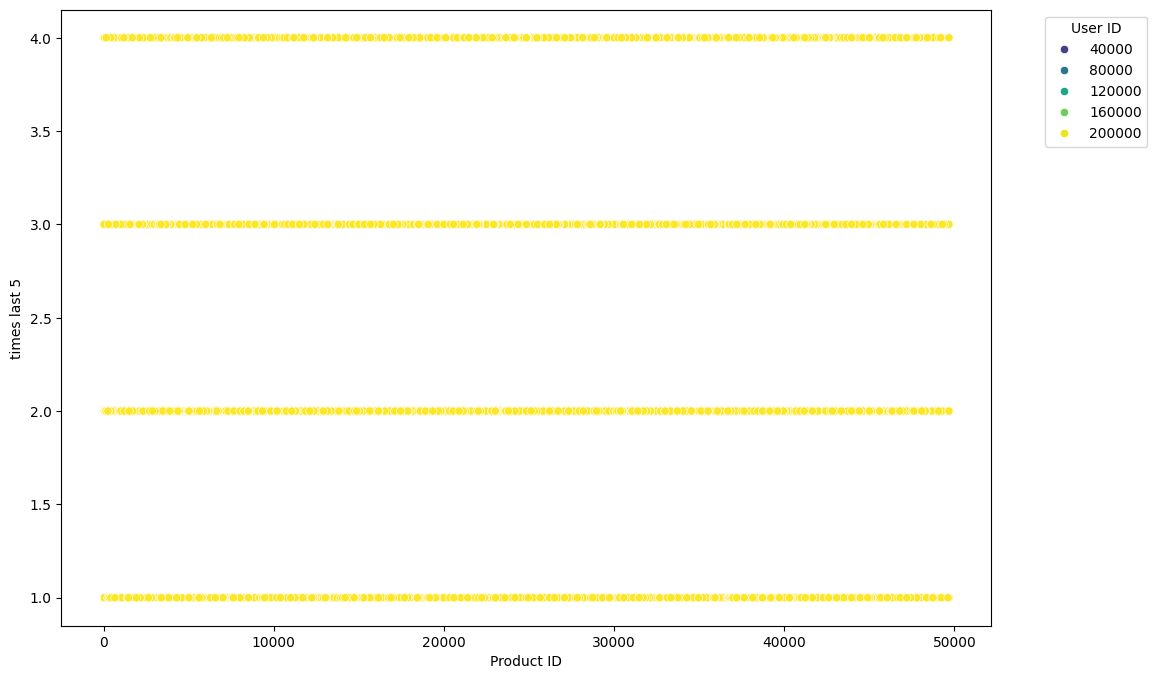

In [25]:
# # scatter plot 생성
# plt.figure(figsize=(12, 8))
# scatter_plot = sns.scatterplot(data=last_five, x='product_id', y='times_last5', hue='user_id', palette='viridis')

# # plot 제목과 축 라벨 설정
# #plt.title('Scatter Plot of Product Purchases')
# plt.xlabel('Product ID')
# plt.ylabel('times last 5')

# # 범례 위치 설정
# plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# # plot 출력
# plt.show()

In [28]:
# 가장 최근 주문한 최대 5개 주문 정보에서, 사용자가 해당 제품을 주문한 횟수의 비율
last_five['times_last5_ratio'] = last_five.times_last5 / 5
last_five

times_last5  times_last5_ratio
user_id product_id                                
1       196.0                 4                0.8
        10258.0               4                0.8
        12427.0               4                0.8
        13032.0               2                0.4
        25133.0               4                0.8
...                         ...                ...
206209  40310.0               1                0.2
        41213.0               3                0.6
        43961.0               1                0.2
        48370.0               1                0.2
        48742.0               1                0.2

[5912536 rows x 2 columns]

In [29]:
#############
uxp = uxp.merge(last_five , on=['user_id', 'product_id'], how='left')
del [last_five, prd5]
gc.collect()
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio
0,1,196.0,10,0.417500,4.0,0.8
1,1,10258.0,9,0.447038,4.0,0.8
2,1,10326.0,1,0.478419,NaN,NaN
3,1,12427.0,10,0.470518,4.0,0.8
4,1,13032.0,3,0.520218,2.0,0.4
...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2
13307949,206209,44325.0,1,0.710110,NaN,NaN
13307950,206209,48370.0,1,0.407439,1.0,0.2
13307951,206209,48697.0,1,0.739338,NaN,NaN


In [28]:
#How frequently a customer bought a product after its first purchase ?

In [30]:
# 사용자가 특정 제품을 구매한 총 횟수
times = prd.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times

Times_Bought_N
user_id product_id                
1       196.0                   10
        10258.0                  9
        10326.0                  1
        12427.0                 10
        13032.0                  3
...                            ...
206209  43961.0                  3
        44325.0                  1
        48370.0                  1
        48697.0                  1
        48742.0                  2

[13307953 rows x 1 columns]

In [31]:
# 사용자의 총 주문 횟수
total_orders = prd.groupby('user_id')[['order_number']].max()
total_orders.columns = ['total_orders']
total_orders

,total_orders
user_id,
1,11
2,15
3,13
4,6
5,5
...,...
206205,4
206206,68
206207,17


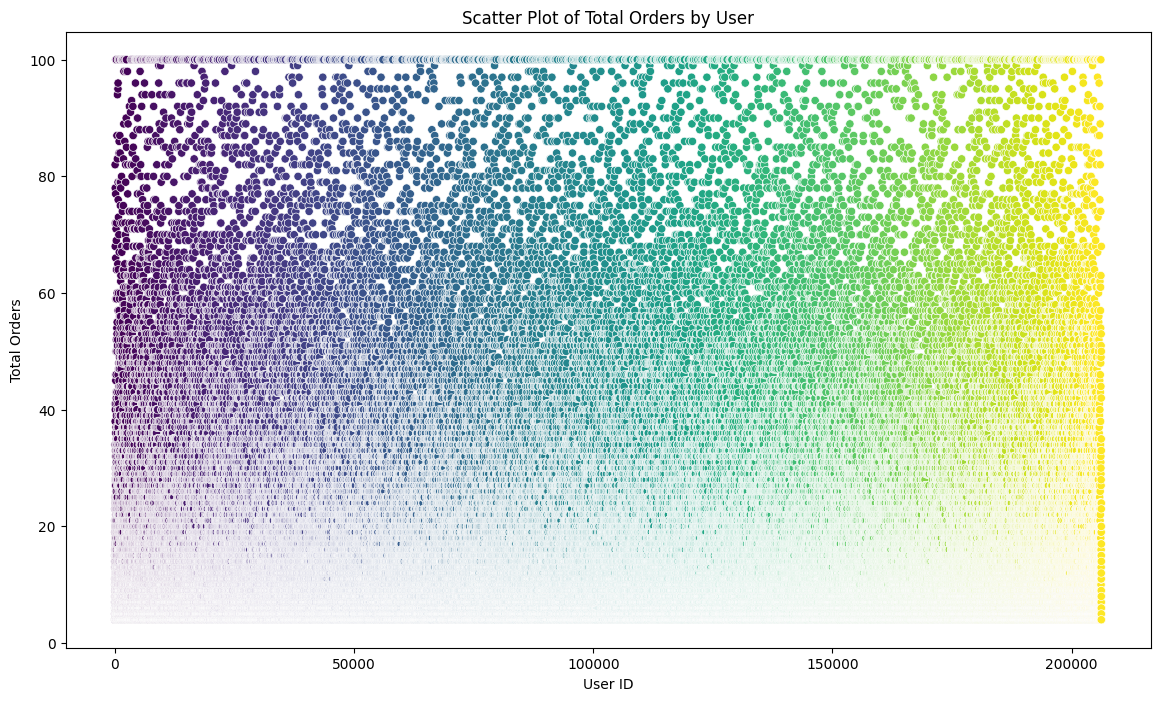

In [32]:
# # scatter 차트 생성
# plt.figure(figsize=(14, 8))
# scatter_plot = sns.scatterplot(data=total_orders, x='user_id', y='total_orders', hue='user_id', palette='viridis', legend=None)

# # plot 제목과 축 라벨 설정
# plt.title('Scatter Plot of Total Orders by User')
# plt.xlabel('User ID')
# plt.ylabel('Total Orders')

# # plot 출력
# plt.show()

C:\Users\jjam\AppData\Local\Temp\ipykernel_12260\4073567978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=total_orders, x='user_id', y='total_orders', palette='viridis')


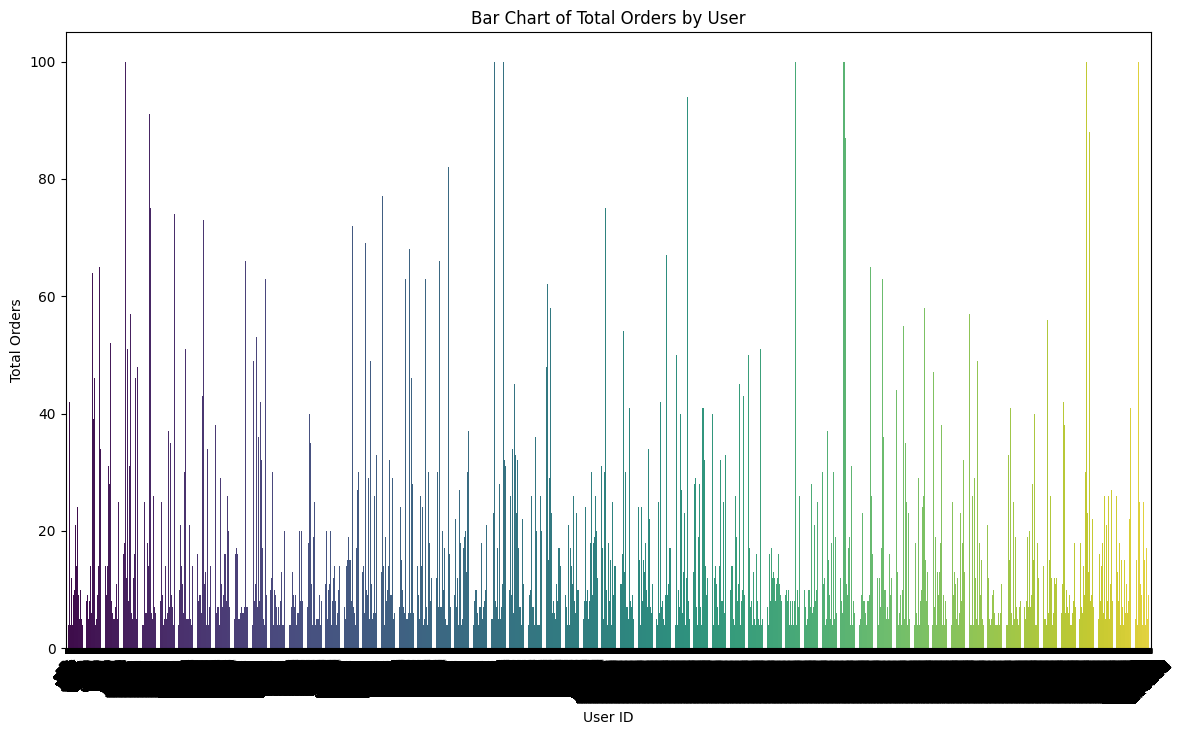

In [31]:
# bar 차트 생성
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=total_orders, x='user_id', y='total_orders', palette='viridis')

# plot 제목과 축 라벨 설정
plt.title('Bar Chart of Total Orders by User')
plt.xlabel('User ID')
plt.ylabel('Total Orders')

# x축 값 회전 (필요 시)
plt.xticks(rotation=45)

# plot 출력
plt.show()

In [28]:
# 사용자가 특정 제품을 처음 구매한 주문 번호 (order_id 아니고 order_number)
first_order_number = prd.groupby(['user_id', 'product_id'])[['order_number']].min()
first_order_number.columns = ['first_order_number']
first_order_number

first_order_number
user_id product_id                    
1       196.0                        1
        10258.0                      2
        10326.0                      5
        12427.0                      1
        13032.0                      2
...                                ...
206209  43961.0                      4
        44325.0                      7
        48370.0                     11
        48697.0                      7
        48742.0                      7

[13307953 rows x 1 columns]

In [29]:
first_order_number_reset = first_order_number.reset_index()
first_order_number_reset

,user_id,product_id,first_order_number
0,1,196.0,1
1,1,10258.0,2
2,1,10326.0,5
3,1,12427.0,1
4,1,13032.0,2
...,...,...,...
13307948,206209,43961.0,4
13307949,206209,44325.0,7
13307950,206209,48370.0,11
13307951,206209,48697.0,7


In [30]:
span = pd.merge(total_orders, first_order_number_reset, on='user_id', how='right')
span

,user_id,total_orders,product_id,first_order_number
0,1,11,196.0,1
1,1,11,10258.0,2
2,1,11,10326.0,5
3,1,11,12427.0,1
4,1,11,13032.0,2
...,...,...,...,...
13307948,206209,14,43961.0,4
13307949,206209,14,44325.0,7
13307950,206209,14,48370.0,11
13307951,206209,14,48697.0,7


In [31]:
# 사용자가 특정 제품을 처음 구매한 이후의 주문 범위 (총 주문 횟수 - 첫 구매 주문 번호 + 1)
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,11,196.0,1,11
1,1,11,10258.0,2,10
2,1,11,10326.0,5,7
3,1,11,12427.0,1,11
4,1,11,13032.0,2,10
...,...,...,...,...,...
13307948,206209,14,43961.0,4,11
13307949,206209,14,44325.0,7,8
13307950,206209,14,48370.0,11,4
13307951,206209,14,48697.0,7,8


In [32]:
order_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
order_ratio

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,1,196.0,10,11,1,11
1,1,10258.0,9,11,2,10
2,1,10326.0,1,11,5,7
3,1,12427.0,10,11,1,11
4,1,13032.0,3,11,2,10
...,...,...,...,...,...,...
13307948,206209,43961.0,3,14,4,11
13307949,206209,44325.0,1,14,7,8
13307950,206209,48370.0,1,14,11,4
13307951,206209,48697.0,1,14,7,8


In [33]:
order_ratio['Order_Ratio_user_id_X_product_id'] = order_ratio.Times_Bought_N / order_ratio.Order_Range_D
del [times, total_orders, first_order_number, span]
order_ratio

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id
0,1,196.0,10,11,1,11,0.909091
1,1,10258.0,9,11,2,10,0.900000
2,1,10326.0,1,11,5,7,0.142857
3,1,12427.0,10,11,1,11,0.909091
4,1,13032.0,3,11,2,10,0.300000
...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,14,4,11,0.272727
13307949,206209,44325.0,1,14,7,8,0.125000
13307950,206209,48370.0,1,14,11,4,0.250000
13307951,206209,48697.0,1,14,7,8,0.125000


In [34]:
###########
uxp = uxp.merge(order_ratio , on=['user_id', 'product_id'], how='left')
del order_ratio
gc.collect()
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000
...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000


In [35]:
#Which products have the highest probability of being reordered?

# 특정 제품이 재주문된 비율. 즉, 해당 제품이 주문될 때 재주문 여부(reordered)의 평균 값
product_var = prd.groupby('product_id')[['reordered']].mean()
product_var.columns = ['reorder_ratio']
product_var

,reorder_ratio
product_id,
1.0,0.613391
2.0,0.133333
3.0,0.732852
4.0,0.446809
5.0,0.600000
...,...
49684.0,0.111111
49685.0,0.122449
49686.0,0.700000


In [36]:
#What is the average position of a product in an order?
# 특정 제품이 장바구니에 추가된 평균 위치. 즉, 해당 제품이 주문 시 장바구니에 추가된 순서의 평균 값
product_var['mean_add_to_cart_order'] = prd.groupby('product_id')[['add_to_cart_order']].mean()
product_var.head()
product_var

,reorder_ratio,mean_add_to_cart_order
product_id,,
1.0,0.613391,5.801836
2.0,0.133333,9.888889
3.0,0.732852,6.415162
4.0,0.446809,9.507599
5.0,0.600000,6.466667
...,...,...
49684.0,0.111111,4.333333
49685.0,0.122449,9.571429
49686.0,0.700000,7.500000


In [37]:
##########
uxp = uxp.merge(product_var, on='product_id', how='left')
del product_var
gc.collect()
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727,0.630583,9.194723
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000,0.401148,10.109900
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000,0.699288,8.344942
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000,0.357661,8.763058


In [38]:
prd.groupby('user_id').order_number.transform(np.max)

C:\Users\jjam\AppData\Local\Temp\ipykernel_9820\391575548.py:1: FutureWarning: The provided callable <function max at 0x000001E3A7533600> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  prd.groupby('user_id').order_number.transform(np.max)


0           11
1           11
2           11
3           11
4           11
            ..
32640693    14
32640694    14
32640695    14
32640696    14
32640697    14
Name: order_number, Length: 32640698, dtype: int64

In [39]:
prd['user_max_onb'] = prd.groupby('user_id').order_number.transform(np.max)

from collections import defaultdict
item_cnt    = defaultdict(int)
item_chance = defaultdict(int)

C:\Users\jjam\AppData\Local\Temp\ipykernel_9820\637505862.py:1: FutureWarning: The provided callable <function max at 0x000001E3A7533600> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  prd['user_max_onb'] = prd.groupby('user_id').order_number.transform(np.max)


In [40]:
prd.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back,user_max_onb
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,11,11
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,11,11
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,11,11
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,11,11
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,11,11
5,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0,10,11
6,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0,10,11
7,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0,10,11
8,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0,10,11
9,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0,10,11


In [41]:
# (Chat-GPT) 특정 제품이 연속적으로 주문된 횟수와 해당 제품이 재주문될 가능성을 계산하는 것입니다.
# 1. prd DataFrame의 각 행을 순회합니다.
# 2. 각 사용자와 제품에 대해 연속적으로 주문된 횟수를 item_cnt에 저장합니다.
# 3. 각 제품이 최종 주문이 아닌 경우의 횟수를 item_chance에 저장합니다.
# 4. 이전 반복에서의 값을 저장하여 다음 반복에서 비교할 수 있도록 합니다.
# 이를 통해 특정 제품이 얼마나 자주 연속적으로 주문되는지와, 해당 제품이 최종 주문이 아닌 경우 얼마나 자주 주문되는지를 분석할 수 있습니다.

pid_back = uid_back = onb_back = None

for user_id, product_id, order_number, max_onb in prd[['user_id', 'product_id', 'order_number', 'user_max_onb']].values:
        
    if user_id==uid_back and product_id==pid_back and (order_number-onb_back==1):
        item_cnt[product_id] +=1
    if order_number!=max_onb:
        item_chance[product_id] +=1
    
    uid_back = user_id
    pid_back = product_id
    onb_back = order_number

In [42]:
# 제품이 연속적으로 주문된 횟수
item_cnt = pd.DataFrame.from_dict(item_cnt, orient='index').reset_index()
item_cnt.columns = ['product_id', 'item_first_cnt']
item_cnt

,product_id,item_first_cnt
0,49235.0,755
1,33735.0,3
2,23803.0,1
3,14715.0,291
4,196.0,1773
...,...,...
12305,1504.0,1
12306,33739.0,1
12307,41932.0,1
12308,6230.0,1


In [43]:
# 제품이 마지막 주문이 아닌 경우의 횟수
item_chance = pd.DataFrame.from_dict(item_chance, orient='index').reset_index()
item_chance.columns = ['product_id', 'item_first_chance']
item_chance

,product_id,item_first_chance
0,196.0,35791
1,14084.0,15935
2,12427.0,6476
3,26088.0,2523
4,26405.0,1214
...,...,...
49672,15408.0,2
49673,8682.0,2
49674,43553.0,13
49675,42338.0,2


In [44]:
df = pd.merge(item_cnt, item_chance, on='product_id', how='outer').fillna(0)

# 제품이 연속적으로 주문된 횟수와 제품이 마지막 주문이 아닌 경우의 비율
df['item_first_ratio'] = df.item_first_cnt/df.item_first_chance
df

,product_id,item_first_cnt,item_first_chance,item_first_ratio
0,1.0,20.0,1852,0.010799
1,2.0,0.0,90,0.000000
2,3.0,1.0,277,0.003610
3,4.0,0.0,329,0.000000
4,5.0,0.0,15,0.000000
...,...,...,...,...
49672,49684.0,0.0,9,0.000000
49673,49685.0,0.0,49,0.000000
49674,49686.0,1.0,120,0.008333
49675,49687.0,0.0,13,0.000000


In [45]:
prd

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back,user_max_onb
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,11,11
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,11,11
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,11,11
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,11,11
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...
32640693,2977660,206209,prior,13,1,12,7.0,38730.0,6.0,0.0,2,14
32640694,2977660,206209,prior,13,1,12,7.0,31477.0,7.0,0.0,2,14
32640695,2977660,206209,prior,13,1,12,7.0,6567.0,8.0,0.0,2,14
32640696,2977660,206209,prior,13,1,12,7.0,22920.0,9.0,0.0,2,14


In [46]:
# (Chat-GPT) 특정 제품이 주어진 사용자에 의해 연속적으로 여러 번 구매되는 횟수와 그에 따른 기회를 계산하는 루프입니다. 
# 여기서 각 제품이 2회, 3회, 4회, 5회 연속으로 구매된 횟수와 그 기회를 기록하는 defaultdict 사전들을 사용하고 있습니다.

item_N2_cnt    = defaultdict(int)
item_N2_chance = defaultdict(int)
item_N3_cnt    = defaultdict(int)
item_N3_chance = defaultdict(int)
item_N4_cnt    = defaultdict(int)
item_N4_chance = defaultdict(int)
item_N5_cnt    = defaultdict(int)
item_N5_chance = defaultdict(int)

pid_back = uid_back = onb_back = None

for product_id, user_id, order_number, max_order_number in prd[['product_id', 'user_id', 'order_number','user_max_onb']].values:
        
    if product_id==pid_back and user_id==uid_back and (order_number-onb_back)<=2 and (max_order_number-order_number) >=2:
        item_N2_cnt[product_id] +=1
    if product_id==pid_back and user_id==uid_back and (max_order_number-order_number) >=2:
        item_N2_chance[product_id] +=1

    if product_id==pid_back and user_id==uid_back and (order_number-onb_back)<=3 and (max_order_number-order_number) >=3:
        item_N3_cnt[product_id] +=1
    if product_id==pid_back and user_id==uid_back and (max_order_number-order_number) >=3:
        item_N3_chance[product_id] +=1

    if product_id==pid_back and user_id==uid_back and (order_number-onb_back)<=4 and (max_order_number-order_number) >=4:
        item_N4_cnt[product_id] +=1
    if product_id==pid_back and user_id==uid_back and (max_order_number-order_number) >=4:
        item_N4_chance[product_id] +=1

    if product_id==pid_back and user_id==uid_back and (order_number-onb_back)<=5 and (max_order_number-order_number) >=5:
        item_N5_cnt[product_id] +=1
    if product_id==pid_back and user_id==uid_back and (max_order_number-order_number) >=5:
        item_N5_chance[product_id] +=1

    pid_back = product_id
    uid_back = user_id
    onb_back = order_number

In [47]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 2회 이내로 연속으로 구매된 횟수
item_N2_cnt = pd.DataFrame.from_dict(item_N2_cnt, orient='index').reset_index()
item_N2_cnt.columns = ['product_id', 'item_N2_cnt']
item_N2_cnt

,product_id,item_N2_cnt
0,49235.0,706
1,33735.0,3
2,23803.0,1
3,14715.0,272
4,196.0,1612
...,...,...
11791,1504.0,1
11792,33739.0,1
11793,41932.0,1
11794,6230.0,1


In [48]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 2회 이내로 연속으로 구매될 가능성이 있었던 횟수
item_N2_chance = pd.DataFrame.from_dict(item_N2_chance, orient='index').reset_index()
item_N2_chance.columns = ['product_id', 'item_N2_chance']
item_N2_chance

,product_id,item_N2_chance
0,49235.0,706
1,33735.0,3
2,23803.0,1
3,14715.0,272
4,196.0,1612
...,...,...
11791,1504.0,1
11792,33739.0,1
11793,41932.0,1
11794,6230.0,1


In [49]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 3회 이내로 연속으로 구매된 횟수
item_N3_cnt = pd.DataFrame.from_dict(item_N3_cnt, orient='index').reset_index()
item_N3_cnt.columns = ['product_id', 'item_N3_cnt']
item_N3_cnt

,product_id,item_N3_cnt
0,33735.0,3
1,23803.0,1
2,14715.0,243
3,196.0,1437
4,23729.0,3
...,...,...
11231,1504.0,1
11232,33739.0,1
11233,41932.0,1
11234,6230.0,1


In [50]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 3회 이내로 연속으로 구매될 가능성이 있었던 횟수
item_N3_chance = pd.DataFrame.from_dict(item_N3_chance, orient='index').reset_index()
item_N3_chance.columns = ['product_id', 'item_N3_chance']
item_N3_chance

,product_id,item_N3_chance
0,33735.0,3
1,23803.0,1
2,14715.0,243
3,196.0,1437
4,23729.0,3
...,...,...
11231,1504.0,1
11232,33739.0,1
11233,41932.0,1
11234,6230.0,1


In [51]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 4회 이내로 연속으로 구매된 횟수
item_N4_cnt = pd.DataFrame.from_dict(item_N4_cnt, orient='index').reset_index()
item_N4_cnt.columns = ['product_id', 'item_N4_cnt']
item_N4_cnt

,product_id,item_N4_cnt
0,33735.0,3
1,23803.0,1
2,14715.0,216
3,196.0,1296
4,23729.0,3
...,...,...
10724,45941.0,1
10725,1504.0,1
10726,33739.0,1
10727,41932.0,1


In [52]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 4회 이내로 연속으로 구매될 가능성이 있었던 횟수
item_N4_chance = pd.DataFrame.from_dict(item_N4_chance, orient='index').reset_index()
item_N4_chance.columns = ['product_id', 'item_N4_chance']
item_N4_chance

,product_id,item_N4_chance
0,33735.0,3
1,23803.0,1
2,14715.0,216
3,196.0,1296
4,23729.0,3
...,...,...
10724,45941.0,1
10725,1504.0,1
10726,33739.0,1
10727,41932.0,1


In [53]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 5회 이내로 연속으로 구매된 횟수
item_N5_cnt = pd.DataFrame.from_dict(item_N5_cnt, orient='index').reset_index()
item_N5_cnt.columns = ['product_id', 'item_N5_cnt']
item_N5_cnt

,product_id,item_N5_cnt
0,33735.0,3
1,23803.0,1
2,14715.0,196
3,196.0,1178
4,27845.0,941
...,...,...
10280,45941.0,1
10281,1504.0,1
10282,33739.0,1
10283,41932.0,1


In [54]:
# (Chat-GPT) 제품이 동일 사용자에 의해 최대 5회 이내로 연속으로 구매될 가능성이 있었던 횟수
item_N5_chance = pd.DataFrame.from_dict(item_N5_chance, orient='index').reset_index()
item_N5_chance.columns = ['product_id', 'item_N5_chance']
item_N5_chance

,product_id,item_N5_chance
0,33735.0,3
1,23803.0,1
2,14715.0,196
3,196.0,1178
4,27845.0,941
...,...,...
10280,45941.0,1
10281,1504.0,1
10282,33739.0,1
10283,41932.0,1


In [55]:
df

,product_id,item_first_cnt,item_first_chance,item_first_ratio
0,1.0,20.0,1852,0.010799
1,2.0,0.0,90,0.000000
2,3.0,1.0,277,0.003610
3,4.0,0.0,329,0.000000
4,5.0,0.0,15,0.000000
...,...,...,...,...
49672,49684.0,0.0,9,0.000000
49673,49685.0,0.0,49,0.000000
49674,49686.0,1.0,120,0.008333
49675,49687.0,0.0,13,0.000000


In [56]:
df2 = pd.merge(item_N2_cnt, item_N2_chance, on='product_id', how='outer')
df3 = pd.merge(item_N3_cnt, item_N3_chance, on='product_id', how='outer')
df4 = pd.merge(item_N4_cnt, item_N4_chance, on='product_id', how='outer')
df5 = pd.merge(item_N5_cnt, item_N5_chance, on='product_id', how='outer')

df_2_3_4_5 = pd.merge(pd.merge(df2, df3, on='product_id', how='outer'),
              pd.merge(df4, df5, on='product_id', how='outer'), 
              on='product_id', how='outer').fillna(0)

df = df.merge(df_2_3_4_5, on='product_id', how='left')

In [57]:
df

,product_id,item_first_cnt,item_first_chance,item_first_ratio,item_N2_cnt,item_N2_chance,item_N3_cnt,item_N3_chance,item_N4_cnt,item_N4_chance,item_N5_cnt,item_N5_chance
0,1.0,20.0,1852,0.010799,20.0,20.0,20.0,20.0,16.0,16.0,14.0,14.0
1,2.0,0.0,90,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,277,0.003610,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4.0,0.0,329,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,15,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49672,49684.0,0.0,9,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49673,49685.0,0.0,49,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49674,49686.0,1.0,120,0.008333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
49675,49687.0,0.0,13,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# (Chat-GPT) 제품이 최대 2~5회 이내로 연속으로 구매된 비율
df['item_N2_ratio'] = df['item_N2_cnt']/df['item_N2_chance']
df['item_N3_ratio'] = df['item_N3_cnt']/df['item_N3_chance']
df['item_N4_ratio'] = df['item_N4_cnt']/df['item_N4_chance']
df['item_N5_ratio'] = df['item_N5_cnt']/df['item_N5_chance']
df

,product_id,item_first_cnt,item_first_chance,item_first_ratio,item_N2_cnt,item_N2_chance,item_N3_cnt,item_N3_chance,item_N4_cnt,item_N4_chance,item_N5_cnt,item_N5_chance,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio
0,1.0,20.0,1852,0.010799,20.0,20.0,20.0,20.0,16.0,16.0,14.0,14.0,1.0,1.0,1.0,1.0
1,2.0,0.0,90,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,277,0.003610,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4.0,0.0,329,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,15,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49672,49684.0,0.0,9,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49673,49685.0,0.0,49,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49674,49686.0,1.0,120,0.008333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
49675,49687.0,0.0,13,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.fillna(0, inplace=True)
df.reset_index(drop=True, inplace=True)

df=df[['product_id', 'item_first_ratio', 'item_N2_ratio','item_N3_ratio', 'item_N4_ratio', 'item_N5_ratio' ]]

del [item_cnt, item_chance, item_N2_cnt, item_N2_chance ,item_N3_cnt ,item_N3_chance,  item_N4_cnt  ,item_N4_chance,  item_N5_cnt, item_N5_chance, df_2_3_4_5]
gc.collect()


############
uxp = uxp.merge(df, on='product_id', how='left')
del df
gc.collect()

0

In [60]:
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727,0.630583,9.194723,0.000831,1.0,1.0,1.0,1.0
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000,0.401148,10.109900,0.000000,0.0,0.0,0.0,0.0
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000,0.699288,8.344942,0.001525,1.0,1.0,1.0,1.0
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000,0.357661,8.763058,0.002044,1.0,1.0,1.0,1.0


In [61]:
#Which aisle has the most products?

In [62]:
# (Chat-GPT) 특정 통로(aisle)에 있는 전체 제품 수
aisle_top = products.groupby('aisle_id')[['product_id']].count()
aisle_top.columns = ['total_products_aisle']
aisle_top.head()
aisle_top

,total_products_aisle
aisle_id,
1,146
2,271
3,832
4,543
5,409
...,...
130,303
131,457
132,178


In [63]:
prod_temp = products.merge(aisle_top, on='aisle_id', how='left')

In [64]:
# (Chat-GPT) 특정 부서(department)에 있는 전체 제품 수
dept_top = products.groupby('department_id')[['product_id']].count()
dept_top.columns = ['total_products_dept']
dept_top.head()

,total_products_dept
department_id,
1,4007
2,548
3,1516
4,1684
5,1054


In [65]:
prod_temp = prod_temp.merge(dept_top, on='department_id', how='left')
prod_temp

,product_id,product_name,aisle_id,department_id,total_products_aisle,total_products_dept
0,1,chocolate_sandwich_cookies,61,19,874,6264
1,2,all-seasons_salt,104,13,797,5371
2,3,robust_golden_unsweetened_oolong_tea,94,7,894,4365
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,880,4007
4,5,green_chile_anytime_sauce,5,13,409,5371
...,...,...,...,...,...,...
49683,49684,vodka-_triple_distilled-_twist_of_vanilla,124,5,195,1054
49684,49685,en_croute_roast_hazelnut_cranberry,42,1,189,4007
49685,49686,artisan_baguette,112,3,557,1516
49686,49687,smartblend_healthy_metabolism_dry_cat_food,41,8,499,972


In [66]:

#prod_temp['total_products_aisle_ratio'] = prod_temp.total_products_aisle/total_products
#prod_temp['total_products_dept_ratio'] = prod_temp.total_products_dept/total_products

In [67]:
#########
uxp = uxp.merge(prod_temp.drop(['aisle_id', 'department_id', 'product_name'],axis=1), on='product_id', how='left')
del prod_temp, products
gc.collect()
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,total_products_aisle,total_products_dept
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,463,4365
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,582,6264
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,382,1684
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,316,6264
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,454,1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727,0.630583,9.194723,0.000831,1.0,1.0,1.0,1.0,615,1684
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000,0.401148,10.109900,0.000000,0.0,0.0,0.0,0.0,457,1858
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000,0.699288,8.344942,0.001525,1.0,1.0,1.0,1.0,322,3085
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000,0.357661,8.763058,0.002044,1.0,1.0,1.0,1.0,375,5371


In [68]:
#ass 3
#Get the average, maximum & minimum order size for each customer.

In [69]:
# 주문에 포함된 product id 수
order_size = prd.groupby(['user_id', 'order_id'])[['product_id']].count()
order_size.columns = ['size'] 
order_size

size
user_id order_id      
1       431534       8
        473747       5
        550135       5
        1187899      0
        2254736      5
...                ...
206209  2307371      3
        2558525      3
        2977660      9
        3154581     13
        3186442      2

[3421083 rows x 1 columns]

In [70]:
# (Chat-GPT) 각 사용자의 평균 주문 크기 (사용자가 주문할 때마다 평균적으로 몇 개의 제품을 주문하는지)
results = order_size.groupby('user_id')[['size']].mean()
results.columns = ['order_size_avg']   
results = results.reset_index()
results

,user_id,order_size_avg
0,1,5.363636
1,2,13.000000
2,3,6.769231
3,4,3.000000
4,5,7.400000
...,...,...
206204,206205,8.000000
206205,206206,4.191176
206206,206207,13.117647
206207,206208,13.540000


In [71]:
##########
uxp = uxp.merge(results, on=['user_id'], how='left')
del [order_size, results]
gc.collect()
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,...,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,total_products_aisle,total_products_dept,order_size_avg
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,...,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,463,4365,5.363636
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,...,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,582,6264,5.363636
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,...,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,382,1684,5.363636
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,...,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,316,6264,5.363636
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,...,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,454,1115,5.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,...,0.630583,9.194723,0.000831,1.0,1.0,1.0,1.0,615,1684,9.214286
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,...,0.401148,10.109900,0.000000,0.0,0.0,0.0,0.0,457,1858,9.214286
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,...,0.699288,8.344942,0.001525,1.0,1.0,1.0,1.0,322,3085,9.214286
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,...,0.357661,8.763058,0.002044,1.0,1.0,1.0,1.0,375,5371,9.214286


In [72]:
uxp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307953 entries, 0 to 13307952
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_id                           int64  
 1   product_id                        float64
 2   uxp_total_bought                  int64  
 3   one_shot_ratio_product            float64
 4   times_last5                       float64
 5   times_last5_ratio                 float64
 6   Times_Bought_N                    int64  
 7   total_orders                      int64  
 8   first_order_number                int64  
 9   Order_Range_D                     int64  
 10  Order_Ratio_user_id_X_product_id  float64
 11  reorder_ratio                     float64
 12  mean_add_to_cart_order            float64
 13  item_first_ratio                  float64
 14  item_N2_ratio                     float64
 15  item_N3_ratio                     float64
 16  item_N4_ratio                     

In [73]:
uxp.drop(['total_products_aisle', 'total_products_dept'], axis=1, inplace=True)

In [74]:
uxp

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,5.363636
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,5.363636
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,5.363636
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,5.363636
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,5.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307948,206209,43961.0,3,0.485358,1.0,0.2,3,14,4,11,0.272727,0.630583,9.194723,0.000831,1.0,1.0,1.0,1.0,9.214286
13307949,206209,44325.0,1,0.710110,NaN,NaN,1,14,7,8,0.125000,0.401148,10.109900,0.000000,0.0,0.0,0.0,0.0,9.214286
13307950,206209,48370.0,1,0.407439,1.0,0.2,1,14,11,4,0.250000,0.699288,8.344942,0.001525,1.0,1.0,1.0,1.0,9.214286
13307951,206209,48697.0,1,0.739338,NaN,NaN,1,14,7,8,0.125000,0.357661,8.763058,0.002044,1.0,1.0,1.0,1.0,9.214286


In [75]:
uxp.to_pickle('uxp.pkl')
uxp.to_csv('uxp.csv')